<a href="https://colab.research.google.com/github/Belvinbarasa/Eng.barasa/blob/main/Bayesian_Liner_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary packages (if running in Colab)
!pip install pymc numpy pandas matplotlib seaborn arviz --quiet

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [ ]:
# Generate synthetic dataset
np.random.seed(42)
days = 500 # Number od data points
temperature = np.random.normal(20, 5, days) # Mean 20°C, std 5
precipitation = 0.5 * temperature + np.random.normal(0, 2, days) # Linear relation with noise

In [ ]:
df = pd.DataFrame({'Temperature': temperature, 'Precipitation': precipitation})

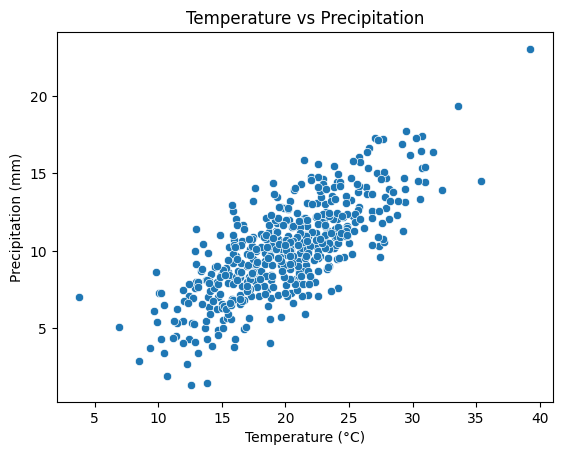

In [ ]:
# Visualize data
sns.scatterplot(x='Temperature', y='Precipitation', data=df)
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.title('Temperature vs Precipitation')
plt.show()

In [ ]:
# Bayesian Linear Regression using PyMC V4+
with pm.Model() as model:
     # Priors for coefficients
     alpha = pm.Normal("alpha", mu=0, sigma=10)
     beta = pm.Normal("beta", mu=0, sigma=10)
     sigma = pm.HalfNormal("sigma", sigma=1)
     # Likelihood (model equation)
     mu = alpha + beta * df['Temperature']
     y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=df['Precipitation'])

     # Sampling
     trace = pm.sample(2000, return_inferencedata=True, cores=2)

Output()

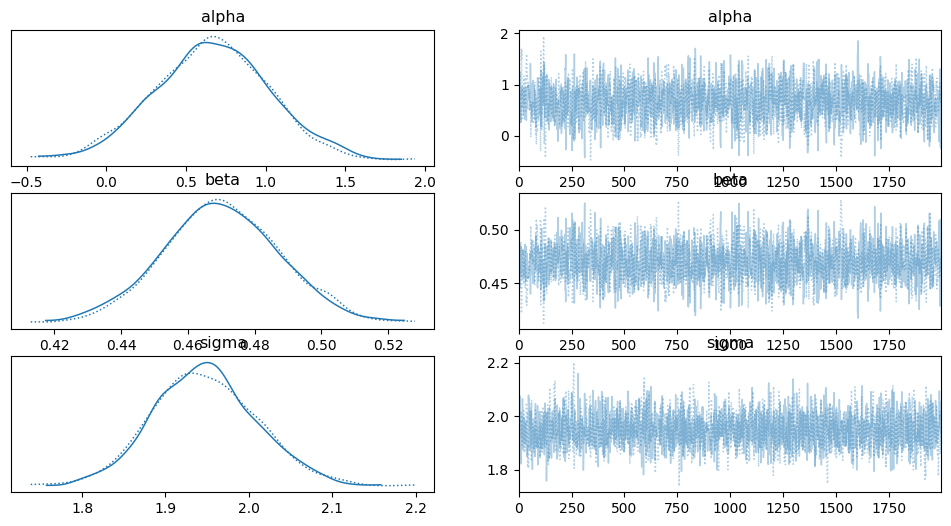

In [ ]:
# Visualizing the posterior distributions
az.plot_trace(trace, var_names=["alpha", "beta", "sigma"])
plt.show()

In [ ]:
# Summary of Bayesian inference
print(az.summary(trace, var_names=["alpha", "beta", "sigma"]))

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  0.661  0.358  -0.035    1.325      0.009    0.006    1589.0    1657.0   
beta   0.470  0.017   0.439    0.504      0.000    0.000    1562.0    1654.0   
sigma  1.947  0.062   1.836    2.070      0.001    0.001    2250.0    1903.0   

       r_hat  
alpha    1.0  
beta     1.0  
sigma    1.0  


In [ ]:
# FIXED: Sample posterior predictive correctly
with model:
     posterior_predictive = pm.sample_posterior_predictive(trace) # FIXED: No 'draws' argument needed
     pred_mean = posterior_predictive.posterior_predictive["y_obs"].mean(dim=["chain", "draw"]).values # FIXED

Output()

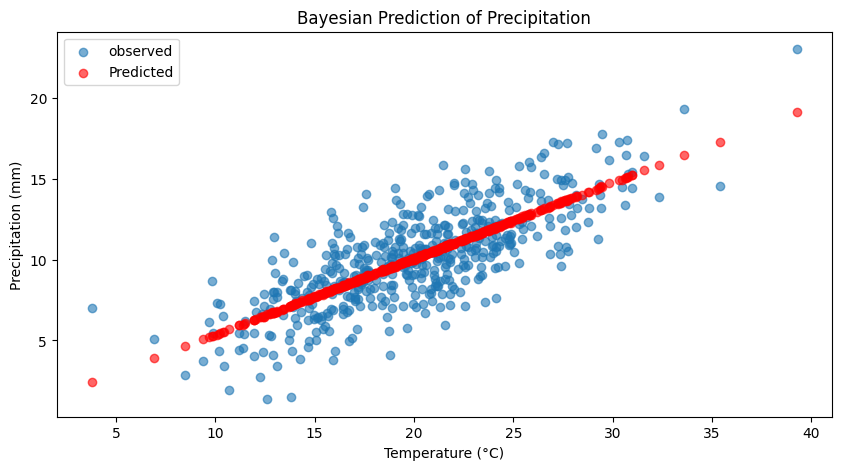

In [ ]:
# Plot Observed vs predicted precipitation
plt.figure(figsize=(10, 5))
plt.scatter(df['Temperature'], df['Precipitation'], label="observed", alpha=0.6)
plt.scatter(df['Temperature'], pred_mean, label="Predicted", alpha=0.6, color='red')
plt.xlabel("Temperature (°C)")
plt.ylabel("Precipitation (mm)")
plt.title("Bayesian Prediction of Precipitation")
plt.legend()
plt.show()